In [1]:
import helper_functions as zero

from demand import LinearDemand, ExponentialDemand
from instance import Backlog, LostSales
from inventory_state import ZeroLeadTime, ErlangLeadTime
from policy import ZeroLeadTimePolicy, ErlangLeadTimePolicy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

In [13]:
2 > 2.5 < 3

False

In [11]:
a = 10
b = 1/200
demand = LinearDemand(a=a, b=b)
profit = 0.01
s = -5
S = 1000
instance = demand.optimal_instance_zero_leadtime(s, S, profit)
s_actual, S_actual, rates_opt, profit_actual = zero.optimal_policy(demand, instance)
rates_2p = zero.leave_zero_out_policy_given_rates(s_actual, S_actual, rates_opt)
rates_3p = zero.three_price_policy_given_rates(s_actual, S_actual, rates_opt)
h_opt = zero.total_holding(s_actual, -1, instance, rates_opt[:-s_actual-1])
h_2p = zero.total_holding(s_actual, -1, instance, rates_2p[:-s_actual-1])
print(s_actual, S_actual, profit_actual)
print(instance)
print(rates_2p[0], rates_2p[-1])
print(rates_3p[0], rates_3p[-1])
print(h_opt, h_2p)
print(h_2p / h_opt)

-7 1000
-7 1000 2.8421709430404007e-11
K = 66949.87, h = 0.50, b = 125.00
2.5642085099515124 2.5642085099515124
4.12092968595984 2.558409725356951
371.9727569219824 437.49125
1.1761378806882876


## Testing Relative Value Iteration

In [4]:
a = 10
b = 1/200
lin_demand = LinearDemand(a=a, b=b)
S = 15
profit = 3
instance = lin_demand.optimal_instance_zero_leadtime(0, S, profit)
state_space = ZeroLeadTime(s=0, S=S)
policy = ZeroLeadTimePolicy(instance=instance, demand=lin_demand, state_space=state_space)
profit_new, prices, J = policy.solve_dp_and_set_policy()

In [5]:
profit_new, prices, J

(2.9999823231232146,
 array([173.11753992, 162.77995473, 154.74519146, 147.93595981,
        141.91961303, 136.47048927, 131.45318184, 126.77887011,
        122.38555948, 118.22794639, 114.271732  , 110.49020781,
        106.86209347, 103.37010739,  99.99998771]),
 array([-2.99998232e-01, -1.25859908e+02, -2.35350291e+02, -3.31222210e+02,
        -4.15061436e+02, -4.88002415e+02, -5.50908779e+02, -6.04466519e+02,
        -6.49237638e+02, -6.85693530e+02, -7.14236994e+02, -7.35217410e+02,
        -7.48941597e+02, -7.55681812e+02, -7.55681787e+02]))

## Bad example for optimal profit ratio

In [2]:
a = 10
b = 1/200
lin_demand = LinearDemand(a=a, b=b)

In [3]:
profits = np.arange(10, 1, -0.1)
for profit in profits:
    instance = lin_demand.optimal_instance_zero_leadtime(0, 3, profit)
    rate, S = zero.optimal_static_policy(instance, lin_demand)
    print(f'{profit:.1f}, {S}, {rate:.6f}', instance, f'{zero.static_profit_given_rate_and_order_size(instance, lin_demand, rate, S) / profit:.4f}')

10.0, 2, 3.523382 K = 118.13, h = 163.33, pi = 0.00 0.3284
9.9, 2, 3.522998 K = 118.16, h = 163.37, pi = 0.00 0.3212
9.8, 2, 3.522613 K = 118.19, h = 163.40, pi = 0.00 0.3139
9.7, 2, 3.522228 K = 118.22, h = 163.43, pi = 0.00 0.3064
9.6, 2, 3.521843 K = 118.25, h = 163.47, pi = 0.00 0.2987
9.5, 2, 3.521459 K = 118.28, h = 163.50, pi = 0.00 0.2909
9.4, 2, 3.521074 K = 118.31, h = 163.53, pi = 0.00 0.2829
9.3, 2, 3.520689 K = 118.34, h = 163.57, pi = 0.00 0.2747
9.2, 2, 3.520304 K = 118.38, h = 163.60, pi = 0.00 0.2664
9.1, 2, 3.519918 K = 118.41, h = 163.63, pi = 0.00 0.2579
9.0, 2, 3.519533 K = 118.44, h = 163.67, pi = 0.00 0.2491
8.9, 2, 3.519148 K = 118.47, h = 163.70, pi = 0.00 0.2402
8.8, 2, 3.518763 K = 118.50, h = 163.73, pi = 0.00 0.2311
8.7, 2, 3.518377 K = 118.53, h = 163.77, pi = 0.00 0.2218
8.6, 2, 3.517992 K = 118.56, h = 163.80, pi = 0.00 0.2122
8.5, 2, 3.517606 K = 118.59, h = 163.83, pi = 0.00 0.2025
8.4, 2, 3.517221 K = 118.62, h = 163.87, pi = 0.00 0.1925
8.3, 2, 3.516

In [4]:
instance = LostSales(h=5, K=6500, pi=0)
for s in range(0, 500, 10):
    print(s+1, zero.optimal_static_profit_given_order_size(instance, lin_demand, s))

1 0
11 -27.5
21 -52.5
31 -77.5
41 -84.921875
51 -66.25
61 -47.46527777777777
71 -34.005102040816325
81 -26.23046875
91 -23.41049382716048
101 -24.6875
111 -29.307851239669475
121 -36.657986111111086
131 -46.25
141 -57.69770408163265
151 -70.69444444444446
161 -84.9951171875
171 -100.40224913494814
181 -116.7554012345679
191 -133.92313019390588
201 -151.796875
211 -170.2862811791383
221 -189.31559917355378
231 -208.82088846880907
241 -228.7478298611112
251 -249.04999999999995
261 -269.6875
271 -290.6258573388203
281 -311.83514030612247
291 -333.2892390011891
301 -354.96527777777777
311 -376.84313215400624
321 -398.905029296875
331 -421.1352157943067
341 -443.51967993079586
351 -466.0459183673469
361 -488.7027391975309
371 -511.48009495982467
381 -534.3689404432132
391 -557.3611111111111
401 -580.44921875
411 -603.6265615704938
421 -626.8870464852608
431 -650.2251216873985
441 -673.6357179752066
451 -697.1141975308642
461 -720.6563090737241
471 -744.2581484834767
481 -767.9161241319443
4

## Linear Demand Numerics

In [6]:
a = 10
b = 1/200
lin_demand = LinearDemand(a=a, b=b)

linear_df = pd.DataFrame([], 
                         columns = [
                             'K', 'h', 
                             'instance', 
                             'policy',
                             'result',
                             'static_policy', 
                             'static_result',
                             'optimal_static_policy',
                             'optimal_static_result',
                             'static_policy_adj', 
                             'static_result_adj',
                             'optimal_static_policy_adj',
                             'optimal_static_result_adj'
                         ])
for K in np.linspace(500, 5000, 10):
    for h in [(i+1)*0.50 for i in range(10)]:
        instance = LostSales(h=h, K=K, pi=0)
        profit, S = zero.optimal_profit_and_inventory_policy(lin_demand, instance)
        print(K,h,profit,S)
        rates = zero.optimal_pricing_policy_given_profit_and_inventory_policy(0, S, lin_demand, instance, profit)
        state_space = ZeroLeadTime(s=0, S=S)
        policy = ZeroLeadTimePolicy(instance=instance, demand=lin_demand, state_space=state_space)
        policy.rates = rates
        result = policy.result
        
        static_rates = zero.static_rates(rates)
        static_policy = ZeroLeadTimePolicy(instance=instance, demand=lin_demand, state_space=state_space)
        static_policy.rates = static_rates
        static_result = static_policy.result
        
        opt_s_rate = zero.optimal_static_rate_given_order_size(instance, lin_demand, S)
        opt_s_policy = ZeroLeadTimePolicy(instance=instance, demand=lin_demand, state_space=state_space)
        opt_s_policy.rates = np.array([opt_s_rate for _ in range(S)])
        opt_s_result = opt_s_policy.result
        
        S_static = int(np.ceil(S / np.sqrt(static_result.holding_cost_ratio(result))))
        static_state_space = ZeroLeadTime(s=0, S=S_static)
        static_policy_adj = ZeroLeadTimePolicy(instance=instance, demand=lin_demand, state_space=static_state_space)
        static_policy_adj.rates = policy.static_rate * np.ones(static_state_space.shape)
        static_result_adj = static_policy_adj.result
                                        
        opt_rate_adj, opt_S = zero.optimal_static_policy(instance, lin_demand)
        opt_state_space = ZeroLeadTime(s=0, S=opt_S)
        opt_policy_adj = ZeroLeadTimePolicy(instance=instance, demand=lin_demand, state_space=opt_state_space)
        opt_policy_adj.rates = np.array([opt_rate_adj for _ in range(opt_S)])
        opt_result_adj = opt_policy_adj.result
        
        # static_result = zero.total_result(0, S, lin_demand, instance, static_rates(rates))
        linear_df = pd.concat([linear_df, pd.DataFrame(
            {
                "K": K, "h": h,"instance": instance, 
                "policy": policy, "result": result,
                "static_policy": static_policy, "static_result": static_result,
                "optimal_static_policy":opt_s_policy, "optimal_static_result": opt_s_result,
                "static_policy_adj": static_policy_adj, "static_result_adj": static_result_adj,
                "optimal_static_policy_adj":opt_policy_adj, "optimal_static_result_adj": opt_result_adj
            }, 
            index=[0])], 
                              ignore_index=True)

500.0 0.5 450.17378521063733 99
500.0 1.0 429.64309850285076 70
500.0 1.5 413.93550480583485 57
500.0 2.0 400.72573870239125 49
500.0 2.5 389.1131405913768 44
500.0 3.0 378.6364271117293 40
500.0 3.5 369.0197213736326 37
500.0 4.0 360.0728297330704 34
500.0 4.5 351.6948486975764 32
500.0 5.0 343.79312285577157 31
1000.0 0.5 429.8931321901307 140
1000.0 1.0 401.2258781940261 98
1000.0 1.5 379.3867496237624 80
1000.0 2.0 361.08585284958394 69
1000.0 2.5 345.0447216412442 61
1000.0 3.0 330.62258498026154 56
1000.0 3.5 317.41481162382 52
1000.0 4.0 305.1810695658048 48
1000.0 4.5 293.73510467118535 45
1000.0 5.0 282.96208367530085 43
1500.0 0.5 414.4355962936572 171
1500.0 1.0 379.6368093483977 120
1500.0 1.5 353.20812583037764 97
1500.0 2.0 331.122840566735 84
1500.0 2.5 311.81630575420627 75
1500.0 3.0 294.4906866592589 68
1500.0 3.5 278.6661570653166 63
1500.0 4.0 264.03124031830316 58
1500.0 4.5 250.38697632871276 55
1500.0 5.0 237.55683106483616 52
2000.0 0.5 401.4760290146171 197
200

In [7]:
revenues = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.revenue)
costs = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.costs)
holds = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.holding)
orders = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.ordering)

row_order = [revenues, costs, holds, orders]

In [8]:
num_policy = 3
col_labels = [
    '$(S^*, \lambda_{static} \cdot \mathbf{1})$', 
    '$(S^*, \lambda_{static}^*(S^*) \cdot \mathbf{1})$', 
    '$(S^*_{static}, \lambda_{static}^*(S^*_{static}) \cdot \mathbf{1})$'
]
# column_order = ["static_result", "static_result_adj", "optimal_static_result", "optimal_static_result_adj"]
column_order = ["static_result", "optimal_static_result", "optimal_static_result_adj"]

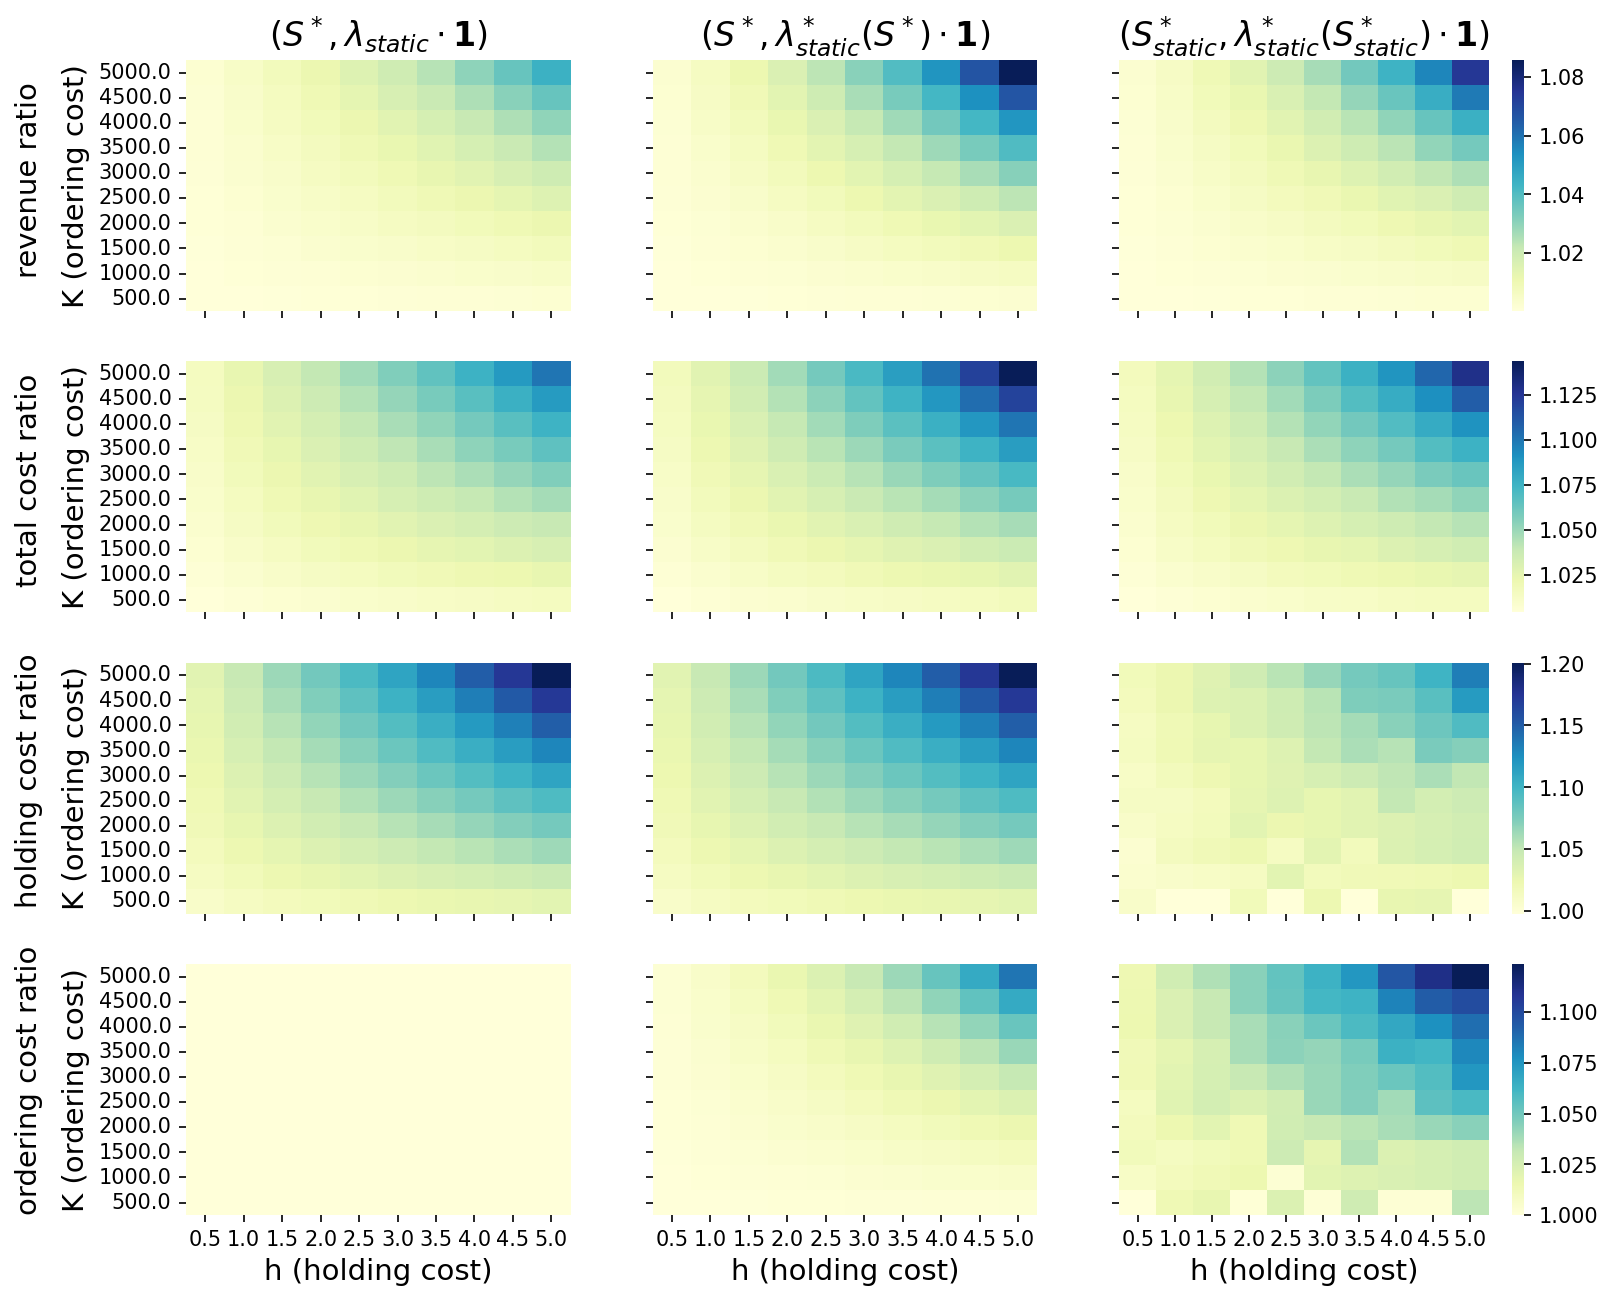

In [9]:
num_metric = 4
fig, axes = plt.subplots(
    num_metric, num_policy, 
    figsize=(4*num_policy,2.5*num_metric), dpi=150, 
    sharex=True, sharey=True,
    gridspec_kw={'width_ratios':[1,1,1.2]}
)

row_labels = ['revenue ratio', 'total cost ratio', 'holding cost ratio', 'ordering cost ratio']
# col_labels = [
#     '$(S^*, \lambda_{static} \cdot \mathbf{1})$', '$(S_{static}, \lambda_{static} \cdot \mathbf{1})$', 
#     '$(S^*, \lambda_{static}^*(S^*) \cdot \mathbf{1})$', 
#     '$(S^*_{static}, \lambda_{static}^*(S^*_{static}) \cdot \mathbf{1})$'
# ]

for r in range(num_metric):
    row_df = pd.concat([row_order[r].div(row_order[r].result, axis=0), linear_df[["K","h"]]], axis=1)
    vmax = row_df[column_order].where(row_df[column_order]>0).max().max()
    vmin = row_df[column_order].where(row_df[column_order]>0).min().min()
    for c in range(num_policy):
        table = row_df.pivot("K", "h", column_order[c])
        if c == num_policy - 1:
            ax = sns.heatmap(table, cmap="YlGnBu", ax=axes[r][c], vmax=vmax, vmin=vmin)
        else:
            ax = sns.heatmap(table, cmap="YlGnBu", ax=axes[r][c], cbar=False, vmax=vmax, vmin=vmin)
        ax.set(xlabel=None, ylabel=None)
        ax.invert_yaxis()
        
        if r == 0:
            ax.set_title(col_labels[c], fontsize=16)
        if c == 0:
            ax.set_ylabel('K (ordering cost)', fontsize=14)
        if r == num_metric - 1:
            ax.set_xlabel('h (holding cost)', fontsize=14)

for i, label in enumerate(row_labels): 
    fig.text(0.03, 0.2*(len(row_labels) - i), label, va='center', rotation='vertical', fontsize=14)

# fig.text(
#     0.5, 0, "Comparison of revenue and cost ratios across policies (Linear demand)", 
#     ha='center', fontsize=16
# )

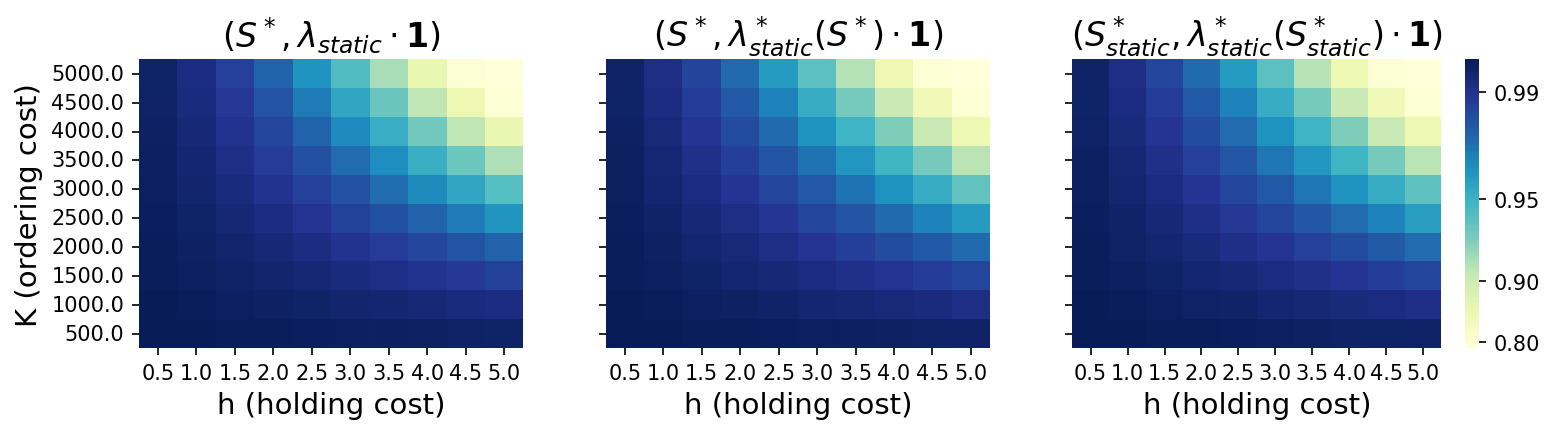

In [10]:
profits = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.profit)

num_metric = 1
fig, axes = plt.subplots(
    num_metric, num_policy, 
    figsize=(4*num_policy,2.5*num_metric), dpi=150, 
    sharex=True, sharey=True,
    gridspec_kw={'width_ratios':[1,1,1.2]}
)

row_labels = ['profit gap (abs.)', 'profit gap (%)']

row_df = pd.concat([profits.div(profits.result, axis=0), linear_df[["K","h"]]], axis=1)
for c in range(num_policy):
    vmax = row_df[column_order].where(row_df[column_order]>0).max().max()
    vmin = row_df[column_order].where(row_df[column_order]>0).min().min()
    table = row_df.pivot("K", "h", column_order[c])
    cmap = "YlGnBu"
    if c == num_policy - 1:
        ticks = [0.99, 0.95, 0.9, 0.8]
        ax = sns.heatmap(table, cmap=cmap, ax=axes[c], vmax=vmax, vmin=vmin, norm=PowerNorm(gamma=4), cbar_kws=dict(ticks=ticks))
    else:
        ax = sns.heatmap(table, cmap=cmap, ax=axes[c], cbar=False, vmax=vmax, vmin=vmin, norm=PowerNorm(gamma=4))
    ax.set(xlabel=None, ylabel=None)
    ax.invert_yaxis()

    ax.set_title(col_labels[c], fontsize=16)
    if c == 0:
        ax.set_ylabel("K (ordering cost)", fontsize=14)
    ax.set_xlabel('h (holding cost)', fontsize=14)

# fig.text(0.5, -0.25, 'Profit ratio for different static policies (Linear demand)', fontsize=16, ha='center')

Text(0.5, 1.0, '$(S^*, \\mathbf{\\lambda}^*)$')

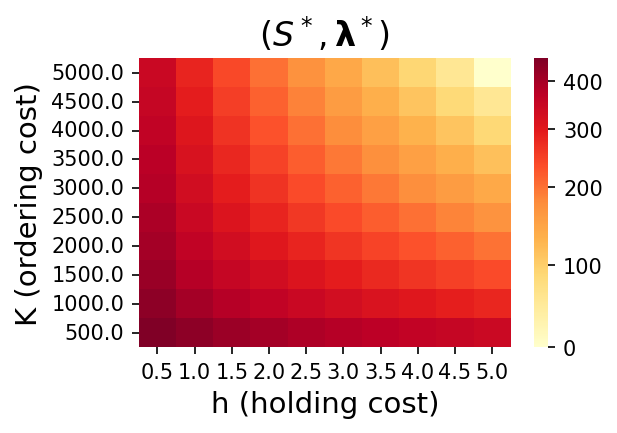

In [11]:
profits = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.profit)
data_df = pd.concat([profits.result, linear_df[["K","h"]]], axis=1)
vmax = data_df.result.max()
vmin = data_df.result.min()
table = data_df.pivot("K", "h", "result")

fig, ax = plt.subplots(
    1, 1, dpi=150, figsize=(4,2.5)
)
cmap = "YlOrRd"
ax = sns.heatmap(table, cmap=cmap, ax=ax, vmax=vmax, vmin=vmin, norm=PowerNorm(0.6))
ax.set_ylabel("K (ordering cost)", fontsize=14)
ax.set_xlabel("h (holding cost)", fontsize=14)
ax.invert_yaxis()
# fig.text(0.38, -0.25, 'Optimal dynamic profit', fontsize=16, ha='center')
ax.set_title("$(S^*, \mathbf{\lambda}^*)$", fontsize=16)

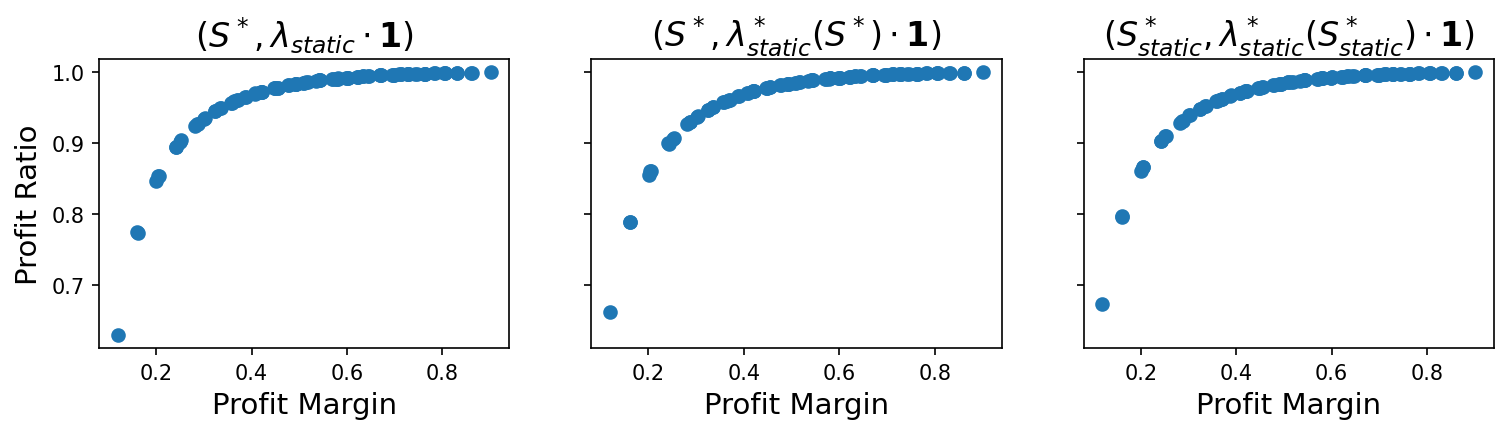

In [12]:
# profit margin vs profit gap
revenues = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.revenue)
profits = linear_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.profit)
margins = profits.result.div(revenues.result, axis=0)
ratios = profits.div(profits.result, axis=0)


fig, axes = plt.subplots(
    1, num_policy, 
    figsize=(4*num_policy,2.5), dpi=150, 
    sharex=True, sharey=True,
)
for c, ax in enumerate(axes):
    ax.scatter(margins, ratios[column_order[c]])
    # ax.scatter(margins, 1 - 5/margins - 400/margins**2,s=1)
    ax.set_title(col_labels[c], fontsize=16)
    if c == 0:
        ax.set_ylabel("Profit Ratio", fontsize=14)
    ax.set_xlabel("Profit Margin", fontsize=14)
# fig.text(0.5, -0.25, "Profit Ratio vs. Profit Margin for different static policies (Linear demand)", fontsize= 16, ha='center')

## Exp Demand Numerics

In [14]:
a = 10
b = 1/100
exp_demand = ExponentialDemand(a=a, b=b)

exponential_df = pd.DataFrame([], 
                              columns = [
                                  'K', 'h', 
                                  'instance', 
                                  'policy',
                                  'result',
                                  'static_policy', 
                                  'static_result',
                                  'optimal_static_policy',
                                  'optimal_static_result',
                                  'static_policy_adj', 
                                  'static_result_adj',
                                  'optimal_static_policy_adj',
                                  'optimal_static_result_adj'
                              ])
for K in np.linspace(500, 5000, 10):
    for h in [(i+1)*0.5 for i in range(10)]:
        instance = LostSales(h=h, K=K, pi=0)
        profit, S = zero.optimal_profit_and_inventory_policy(exp_demand, instance)
        rates = zero.optimal_pricing_policy_given_profit_and_inventory_policy(0, S, exp_demand, instance, profit)
        state_space = ZeroLeadTime(s=0, S=S)
        policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
        policy.rates = rates
        result = policy.result
        
        static_rates = zero.static_rates(rates)
        static_policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
        static_policy.rates = static_rates
        static_result = static_policy.result
        
        opt_s_rate = zero.optimal_static_rate_given_order_size(instance, exp_demand, S)
        opt_s_policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
        opt_s_policy.rates = np.array([opt_s_rate for _ in range(S)])
        opt_s_result = opt_s_policy.result
        
        S_static = int(np.ceil(S / np.sqrt(static_result.holding_cost_ratio(result))))
        static_state_space = ZeroLeadTime(s=0, S=S_static)
        static_policy_adj = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=static_state_space)
        static_policy_adj.rates = policy.static_rate * np.ones(static_state_space.shape)
        static_result_adj = static_policy_adj.result
                                        
        opt_rate_adj, opt_S = zero.optimal_static_policy(instance, exp_demand)
        opt_state_space = ZeroLeadTime(s=0, S=opt_S)
        opt_policy_adj = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=opt_state_space)
        opt_policy_adj.rates = np.array([opt_rate_adj for _ in range(opt_S)])
        opt_result_adj = opt_policy_adj.result
        
        # static_result = zero.total_result(0, S, lin_demand, instance, static_rates(rates))
        exponential_df = pd.concat([exponential_df, pd.DataFrame(
            {
                "K": K, "h": h,"instance": instance, 
                "policy": policy, "result": result,
                "static_policy": static_policy, "static_result": static_result,
                "optimal_static_policy":opt_s_policy, "optimal_static_result": opt_s_result,
                "static_policy_adj": static_policy_adj, "static_result_adj": static_result_adj,
                "optimal_static_policy_adj":opt_policy_adj, "optimal_static_result_adj": opt_result_adj
            }, 
            index=[0])], 
                              ignore_index=True)

In [15]:
revenues = exponential_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.revenue)
costs = exponential_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.costs)
holds = exponential_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.holding)
orders = exponential_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.ordering)

row_order = [revenues, costs, holds, orders]

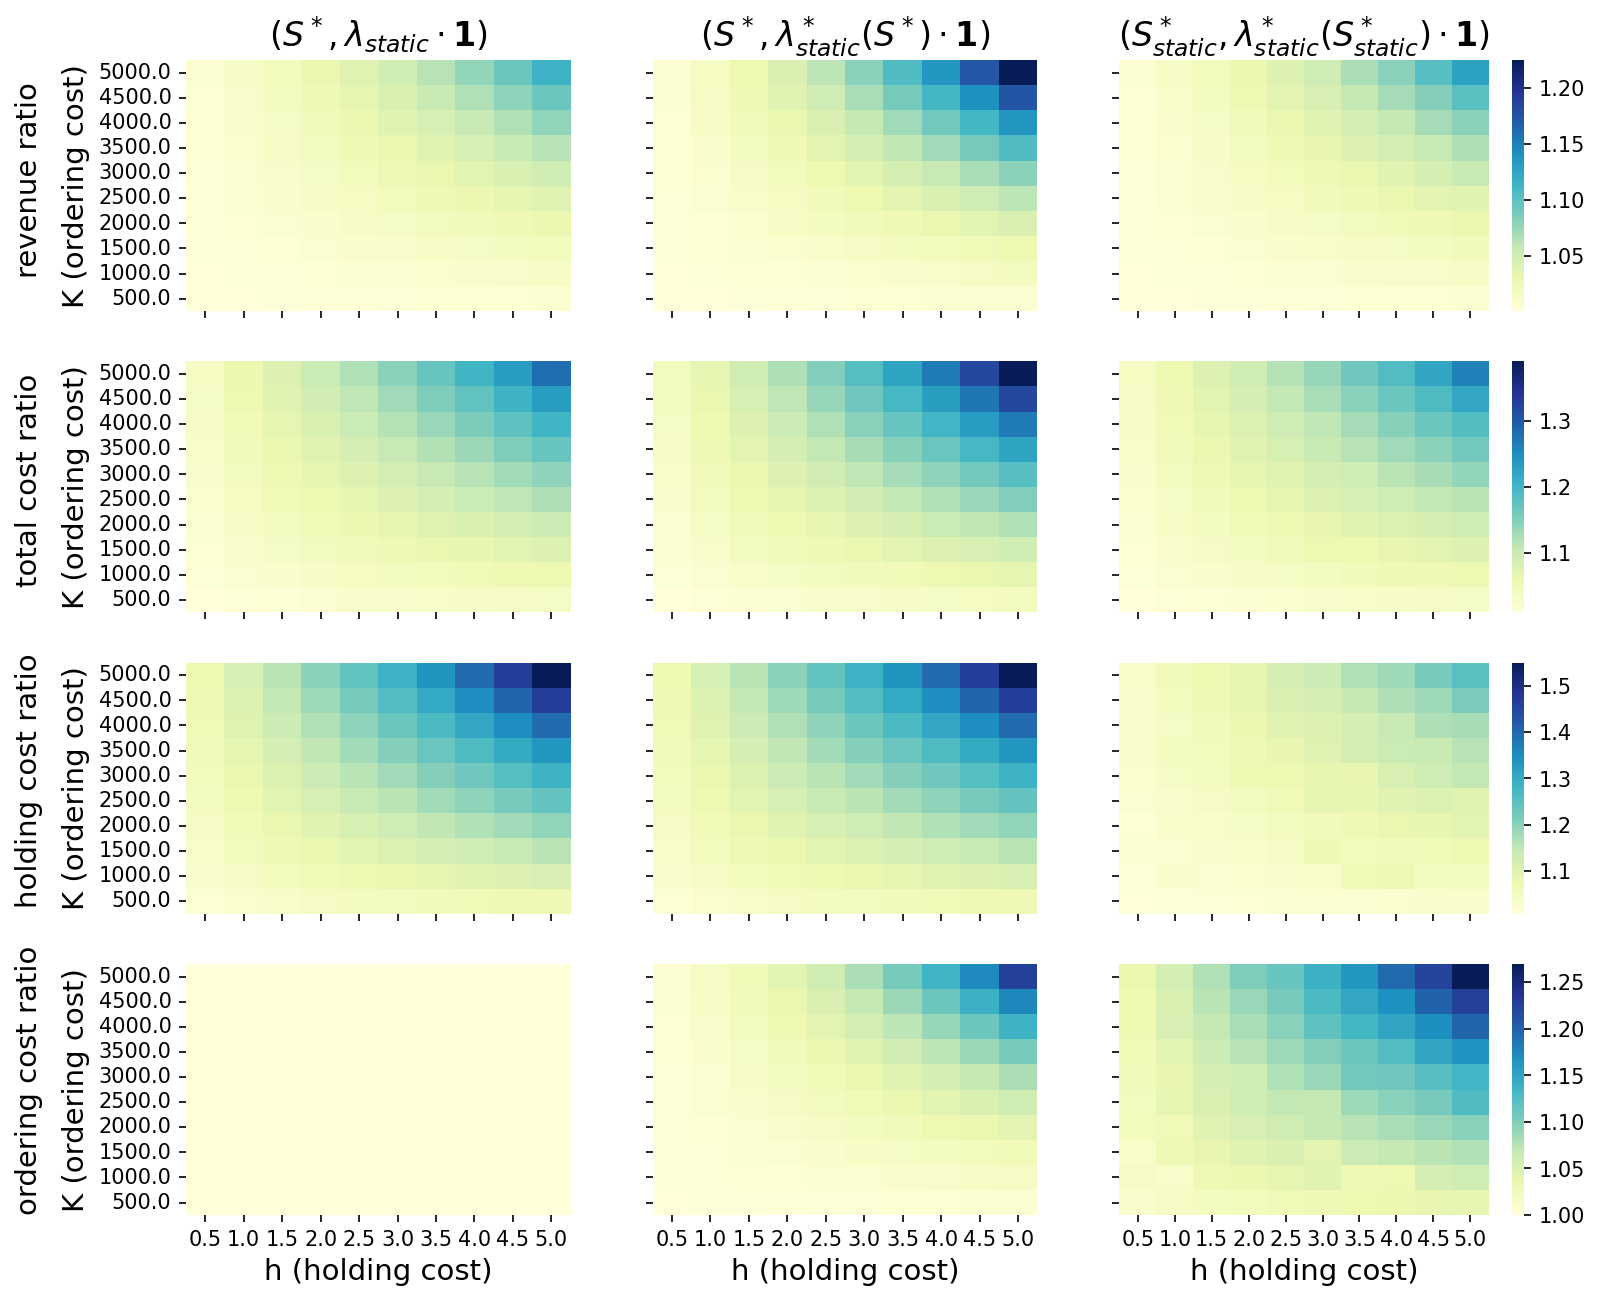

In [16]:
# num_policy = 4
num_metric = 4
fig, axes = plt.subplots(
    num_metric, num_policy, 
    figsize=(4*num_policy,2.5*num_metric), dpi=150, 
    sharex=True, sharey=True,
    gridspec_kw={'width_ratios':[1,1,1.2]}
)

row_labels = ['revenue ratio', 'total cost ratio', 'holding cost ratio', 'ordering cost ratio']
# col_labels = [
#     '$(S^*, \lambda_{static} \cdot \mathbf{1})$', '$(S_{static}, \lambda_{static} \cdot \mathbf{1})$', 
#     '$(S^*, \lambda_{static}^*(S^*) \cdot \mathbf{1})$', 
#     '$(S^*_{static}, \lambda_{static}^*(S^*_{static}) \cdot \mathbf{1})$'
# ]

for r in range(num_metric):
    row_df = pd.concat([row_order[r].div(row_order[r].result, axis=0), exponential_df[["K","h"]]], axis=1)
    vmax = row_df[column_order].where(row_df[column_order]>0).max().max()
    vmin = row_df[column_order].where(row_df[column_order]>0).min().min()
    for c in range(num_policy):
        table = row_df.pivot("K", "h", column_order[c])
        if c == num_policy - 1:
            ax = sns.heatmap(table, cmap="YlGnBu", ax=axes[r][c], vmax=vmax, vmin=vmin)
        else:
            ax = sns.heatmap(table, cmap="YlGnBu", ax=axes[r][c], cbar=False, vmax=vmax, vmin=vmin)
        ax.set(xlabel=None, ylabel=None)
        ax.invert_yaxis()
        
        if r == 0:
            ax.set_title(col_labels[c], fontsize=16)
        if c == 0:
            ax.set_ylabel('K (ordering cost)', fontsize=14)
        if r == num_metric - 1:
            ax.set_xlabel('h (holding cost)', fontsize=14)

for i, label in enumerate(row_labels): 
    fig.text(0.03, 0.2*(len(row_labels) - i), label, va='center', rotation='vertical', fontsize=14)
    
# fig.text(
#     0.5, 0.93, "Comparison of revenue and cost ratios across policies (Exponential demand)", 
#     ha='center', fontsize=16
# )

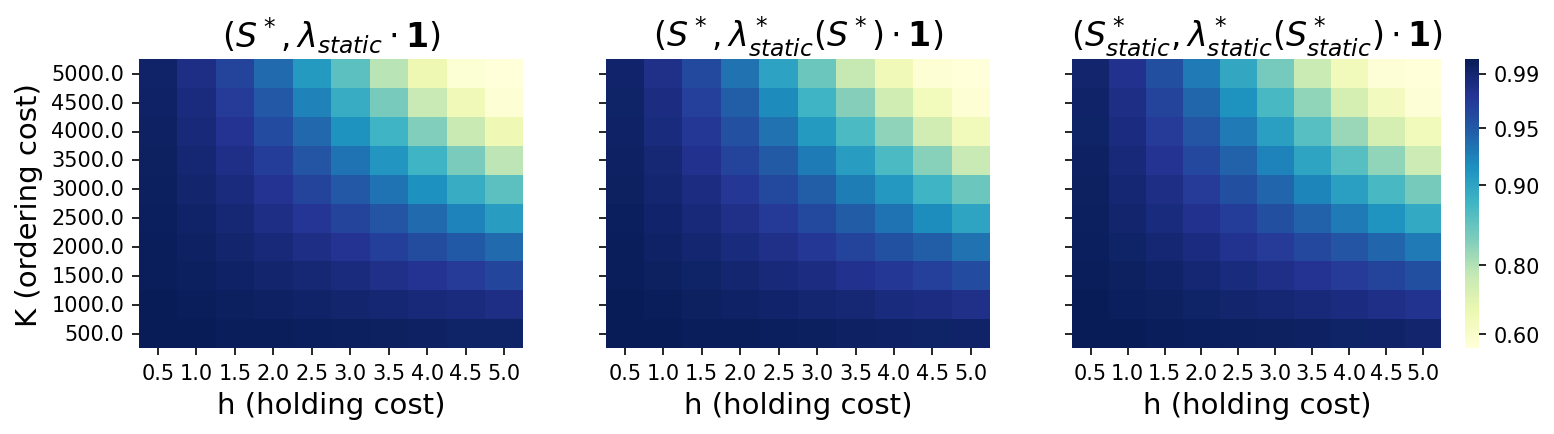

In [17]:
profits = exponential_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.profit)

num_policy = 3
num_metric = 1
fig, axes = plt.subplots(
    num_metric, num_policy, 
    figsize=(4*num_policy,2.5*num_metric), dpi=150, 
    sharex=True, sharey=True,
    gridspec_kw={'width_ratios':[1,1,1.2]}
)

row_labels = ['profit gap (abs.)', 'profit gap (%)']

row_df = pd.concat([profits.div(profits.result, axis=0), exponential_df[["K","h"]]], axis=1)
for c in range(num_policy):
    vmax = row_df[column_order].where(row_df[column_order]>0).max().max()
    vmin = row_df[column_order].where(row_df[column_order]>0).min().min()
    table = row_df.pivot("K", "h", column_order[c])
    cmap = "YlGnBu"
    if c == num_policy - 1:
        ticks = [0.99, 0.95, 0.9, 0.8, 0.6]
        ax = sns.heatmap(table, cmap=cmap, ax=axes[c], vmax=vmax, vmin=vmin, norm=PowerNorm(gamma=4), cbar_kws=dict(ticks=ticks))
    else:
        ax = sns.heatmap(table, cmap=cmap, ax=axes[c], cbar=False, vmax=vmax, vmin=vmin, norm=PowerNorm(gamma=4))
    ax.set(xlabel=None, ylabel=None)
    ax.invert_yaxis()

    ax.set_title(col_labels[c], fontsize=16)
    if c == 0:
        ax.set_ylabel("K (ordering cost)", fontsize=14)
    ax.set_xlabel('h (holding cost)', fontsize=14)

# fig.text(0.5, -0.25, 'Profit ratio for different static policies (Exponential demand)', fontsize=16, ha='center')

Text(0.5, 1.0, '$(S^*, \\mathbf{\\lambda}^*)$')

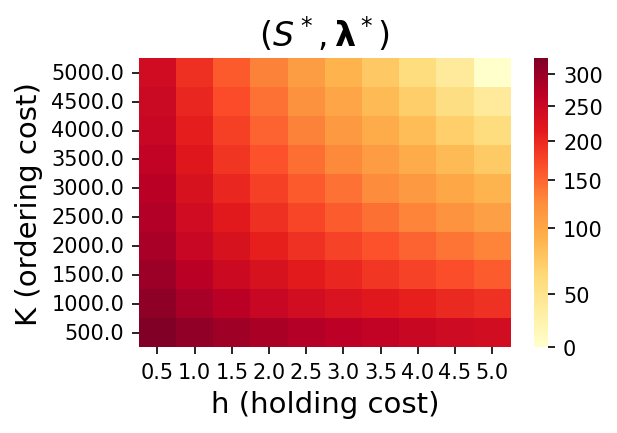

In [18]:
profits = exponential_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.profit)
data_df = pd.concat([profits.result, exponential_df[["K","h"]]], axis=1)
vmax = data_df.result.max()
vmin = data_df.result.min()
table = data_df.pivot("K", "h", "result")

fig, ax = plt.subplots(
    1, 1, dpi=150, figsize=(4,2.5)
)
cmap = "YlOrRd"
ax = sns.heatmap(table, cmap=cmap, ax=ax, vmax=vmax, vmin=vmin, norm=PowerNorm(0.6))
ax.set_ylabel("K (ordering cost)", fontsize=14)
ax.set_xlabel("h (holding cost)", fontsize=14)
ax.invert_yaxis()
# fig.text(0.38, -0.25, 'Optimal dynamic profit', fontsize=16, ha='center')
ax.set_title("$(S^*, \mathbf{\lambda}^*)$", fontsize=16)

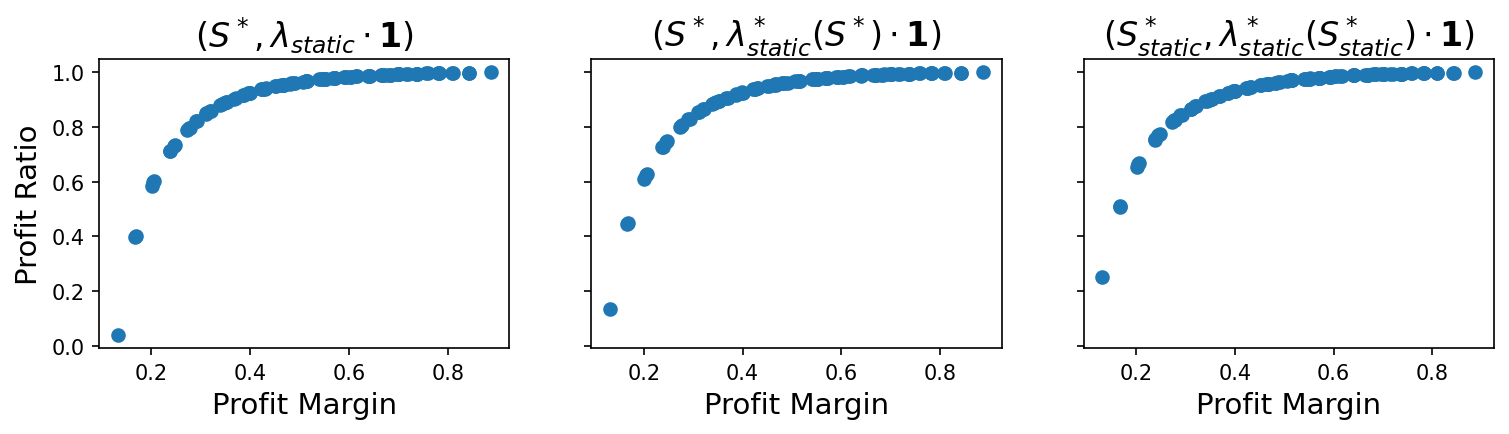

In [19]:
# profit margin vs profit gap
profits = exponential_df[["result", "static_result", "optimal_static_result", "static_result_adj", "optimal_static_result_adj"]]\
    .applymap(lambda x: x.profit)
margins = profits.result.div(revenues.result, axis=0)
ratios = profits.div(profits.result, axis=0)

fig, axes = plt.subplots(
    1, num_policy, 
    figsize=(4*num_policy,2.5), dpi=150, 
    sharex=True, sharey=True,
)
for c, ax in enumerate(axes):
    ax.scatter(margins, ratios[column_order[c]])
    ax.set_title(col_labels[c], fontsize=16)
    if c == 0:
        ax.set_ylabel("Profit Ratio", fontsize=14)
    ax.set_xlabel("Profit Margin", fontsize=14)
# fig.text(0.5, -0.25, "Profit Ratio vs. Profit Margin for different static policies (Exponential demand)", fontsize= 16, ha='center')

In [20]:
pd.set_option("display.precision", 4)
profits.div(profits.result, axis=0)[column_order].agg(['mean', 'std', 'min']).T

,mean,std,min
static_result,0.9128,0.1467,0.0396
optimal_static_result,0.9171,0.1349,0.1352
optimal_static_result_adj,0.9249,0.1187,0.2519


## Proof of Theorem 3 (Linear demand changing S)

In [21]:
# Linear demand
length = 400
num = 0
den = 0
ratios = []
for i in range(1,length):
    num += i**0.5
    den += i**(-0.5)
    static = (i+1) / 2
    dyn = num / den
    alpha = static / dyn
    new_i = np.ceil(-0.5+(0.25+i*(i+1)/alpha)**0.5)
    new_static = (new_i+1) / 2
    ratio = new_static / dyn
    ratios.append(ratio)

In [22]:
# Linear demand
length = 25
num = 0
den = 0
ratios = []
for i in range(1,length):
    num += i**0.5
    den += i**(-0.5)
    static = (i+1) / 2
    dyn = num / den
    alpha = static / dyn
    new_i = np.ceil(i/1.5**0.5)
    new_static = (new_i+1) / 2
    ratio = new_static / dyn
    ratios.append(ratio)

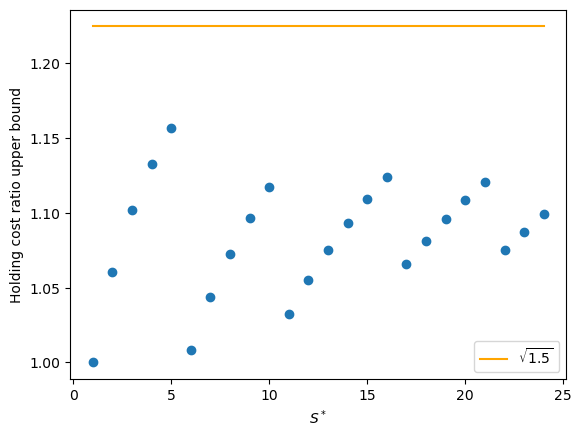

In [23]:
plt.scatter(np.arange(1,length), ratios)
plt.plot(np.arange(1,length), np.ones(length-1)*np.sqrt(1.5), color="orange", label="$\sqrt{1.5}$")
plt.ylabel("Holding cost ratio upper bound")
plt.xlabel("$S^*$")
plt.legend()
plt.show()

## Optimal and static rates for backlogging

In [26]:
a = 30
b = 1/15
lin_demand = LinearDemand(a=a, b=b)
s = -11
S = 200
profit = 2
instance = lin_demand.optimal_instance_zero_leadtime(s, S, profit)
state_space = ZeroLeadTime(s=s, S=S)
profit = zero.optimal_profit_given_inventory_policy(lin_demand, instance, s, S)
print('Profit:', profit)
states = np.arange(s+1, S+1)
optimal_rates = np.sqrt(a * b * (profit + instance.holding(states)))
three_price_rates = zero.three_price_policy_given_rates(s, S, optimal_rates)

Profit: 2.0000000000067075


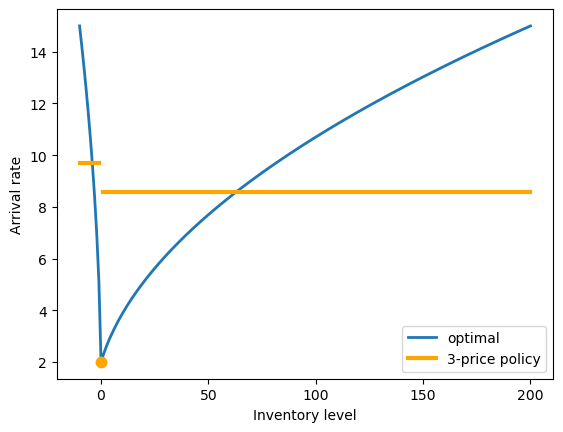

In [27]:
plt.plot(states, optimal_rates, label="optimal", linewidth=2)
plt.plot(states[states < 0], three_price_rates[:-s-1], label="3-price policy", linewidth=3, color="orange")
plt.plot(0, three_price_rates[-s-1], marker=".", color="orange", markersize=15)
plt.plot(states[states > 0], three_price_rates[-s:], color="orange", linewidth=3)
plt.xlabel("Inventory level")
plt.ylabel("Arrival rate")
# plt.title("Optimal rates vs 3-price arrival rates with backlogging")
plt.legend()
plt.show()

## Profit Margin vs Profit Ratio

In [29]:
np.random.seed(2023)
samples = 1500
profit_dyn = []
profit_stat = []
revenue_dyn = []
for i in range(samples):
    K = np.random.rand()*9900.0 + 100
    h = np.random.rand()*9.9 + 0.1
    a = np.random.rand()*5
    b = np.random.rand()*0.0015 + 0.0005
    if i == 387:
        print(K, h, a, b)
    exp_demand = ExponentialDemand(a=a, b=b)
    instance = LostSales(h=h, K=K, pi=0)
    
    profit, S = zero.optimal_profit_and_inventory_policy(exp_demand, instance)
    rates = zero.optimal_pricing_policy_given_profit_and_inventory_policy(0, S, exp_demand, instance, profit)
    state_space = ZeroLeadTime(s=0, S=S)
    policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
    policy.rates = rates
    result = policy.result
    if policy.result.profit <= 0:
        print(i, "Negative profit")
        continue
    # print(i, S)
    # print(result)

#     static_rates = zero.static_rates(rates)
#     static_policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
#     static_policy.rates = static_rates
#     static_result = static_policy.result

#     opt_s_rate = zero.optimal_static_rate_given_order_size(instance, exp_demand, S)
#     opt_s_policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
#     opt_s_policy.rates = np.array([opt_s_rate for _ in range(S)])
#     opt_s_result = opt_s_policy.result

#     S_static = int(np.ceil(S / np.sqrt(static_result.holding_cost_ratio(result))))
#     static_state_space = ZeroLeadTime(s=0, S=S_static)
#     static_policy_adj = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=static_state_space)
#     static_policy_adj.rates = policy.static_rate * np.ones(static_state_space.shape)
#     static_result_adj = static_policy_adj.result

    opt_rate_adj, opt_S = zero.optimal_static_policy(instance, exp_demand)
    opt_state_space = ZeroLeadTime(s=0, S=opt_S)
    opt_policy_adj = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=opt_state_space)
    opt_policy_adj.rates = np.array([opt_rate_adj for _ in range(opt_S)])
    opt_result_adj = opt_policy_adj.result
    
    if opt_S == 0:
        print("WUUUT")
        continue
    profit_dyn.append(result.profit)
    revenue_dyn.append(result.revenue)
    profit_stat.append(opt_result_adj.profit)

15 Negative profit
20 Negative profit
72 Negative profit
82 Negative profit
134 Negative profit
151 Negative profit
153 Negative profit
WUUUT
248 Negative profit
327 Negative profit
341 Negative profit
361 Negative profit
370 Negative profit
375 Negative profit
6105.289250884653 1.913166648287034 1.2955873800181368 0.000502706598508905
388 Negative profit
411 Negative profit
413 Negative profit
418 Negative profit
454 Negative profit
WUUUT
468 Negative profit
473 Negative profit
474 Negative profit
492 Negative profit
514 Negative profit
538 Negative profit
556 Negative profit
573 Negative profit
615 Negative profit
616 Negative profit
632 Negative profit
658 Negative profit
661 Negative profit
679 Negative profit
683 Negative profit
WUUUT
714 Negative profit
719 Negative profit
726 Negative profit
WUUUT
764 Negative profit
777 Negative profit
786 Negative profit
WUUUT
867 Negative profit
WUUUT
901 Negative profit
994 Negative profit
1001 Negative profit
WUUUT
1045 Negative profit
WUUU

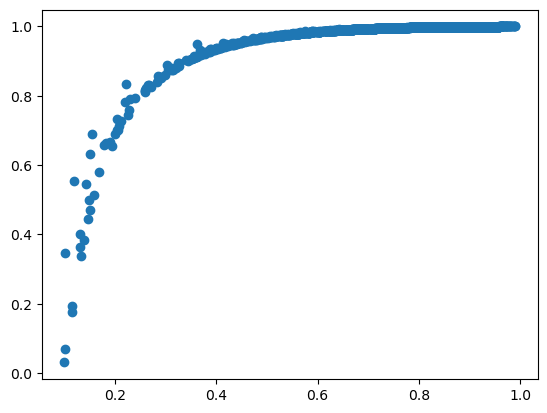

In [30]:
profit_dyn = np.array(profit_dyn)
profit_stat = np.array(profit_stat)
revenue_dyn = np.array(revenue_dyn)
plt.scatter(profit_dyn / revenue_dyn, profit_stat/profit_dyn)

## Instance ranges

In [31]:
# Linear Demand

a = 10
b = 1/200
lin_demand = LinearDemand(a=a, b=b)

K = 5000
h = 5
instance = LostSales(h=h, K=K, pi=0)

print(zero.optimal_profit_and_inventory_policy(lin_demand, instance))
print(zero.static_profit_given_rate_and_order_size(instance, lin_demand, *zero.optimal_static_policy(instance, lin_demand)))

(50.74728610870238, 89)
34.169501133786866


In [32]:
zero.static_profit_given_rate_and_order_size(instance, lin_demand, 3, 150)

-57.5

In [33]:
# Exponential Demand

a_exp = 10
b_exp = 1/100
exp_demand = ExponentialDemand(a=a_exp, b=b_exp)

K = 5000
h = 5
instance = LostSales(h=h, K=K, pi=0)

print(zero.optimal_profit_and_inventory_policy(exp_demand, instance))
print(zero.optimal_static_policy(instance, exp_demand))
print(zero.static_profit_given_rate_and_order_size(instance, exp_demand, *zero.optimal_static_policy(instance, exp_demand)))

(32.7175299403264, 67)
(1.4574074922416909, 54)
8.24074922416915


## Optimal Static Policy

In [259]:
a = 10
b = 1/200
lin_demand = LinearDemand(a=a, b=b)

K = 6000
h = 6
instance = LostSales(h=h, K=K, pi=0)

def profit(l, s):
    if s == 0:
        return 0
    return l * lin_demand.price(l) -K*l/s - (s+1)*h/2

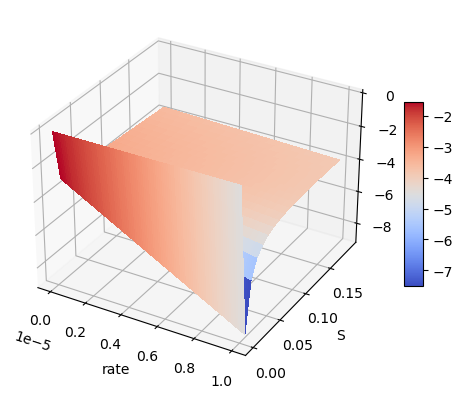

In [297]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Ls = np.linspace(0, 0.00001, 100)
levels = np.arange(0, 0.2, 0.01)
Ls, levels = np.meshgrid(Ls, levels)
profits = np.array([[profit(l, s) for l, s in zip(ls, ss)] for ls, ss in zip(Ls, levels)])

surf = ax.plot_surface(Ls, levels, profits, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("rate")
ax.set_ylabel("S")
fig.colorbar(surf, shrink=0.5, aspect=10)

## Bad holding cost ratio for zero lead time backlogging model (linear demand) 

In [2]:
a = 30
b = 1/15
lin_demand = LinearDemand(a=a, b=b) # linear demand: lambda = a(1-bp)

profit = 0.1
S = 1
s = -2
states = np.arange(s+1, S+1)
h = a/4/b - profit
pi = h
instance = Backlog(h=h, K=10, pi=pi) # set a random K value
K = sum([zero.g(instance, lin_demand, i, profit) for i in states])
instance = Backlog(h=h, K=K, pi=pi)

In [3]:
state_space = ZeroLeadTime(s=s, S=S)
policy = ZeroLeadTimePolicy(instance=instance, demand=lin_demand, state_space=state_space)

In [4]:
policy.set_optimal_policy()

In [5]:
def get_x_width(rates):
    return np.r_[0, np.cumsum(1/rates)[:-1]] / np.sum(1/rates), 1/rates/np.sum(1/rates)

rates = policy.rates
stat_rate = policy.static_rate
heights = instance.holding(states)
x, width = get_x_width(rates)
x_stat, width_stat = get_x_width(stat_rate*np.ones_like(states))

In [6]:
x, width

(array([0.       , 0.0281365, 0.9718635]),
 array([0.0281365 , 0.94372699, 0.0281365 ]))

In [7]:
x_stat, width_stat

(array([0.        , 0.33333333, 0.66666667]),
 array([0.33333333, 0.33333333, 0.33333333]))

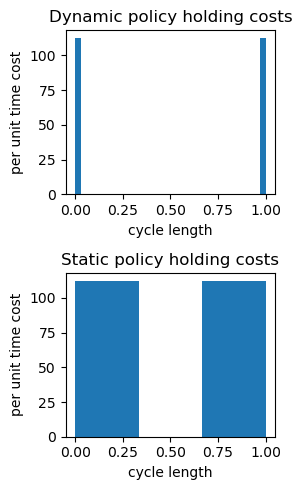

In [12]:
fig, ax = plt.subplots(2,1, figsize=(3,5))
ax[0].bar(x, heights, width, align='edge')
ax[1].bar(x_stat, heights, width_stat, align='edge')

[ax[i].set_ylabel("per unit time cost") for i in range(0,2)]
[ax[i].set_xlabel("cycle length") for i in range(0,2)]

ax[0].set_title("Dynamic policy holding costs")
ax[1].set_title("Static policy holding costs")

plt.tight_layout()

## Worst case plots for zero leadtime

In [14]:
a = 30
b = 1/15
exp_demand = ExponentialDemand(a=a, b=b) # Exponential demand: lambda = ae^(-bp)
hold_ratios_exp = []
cost_ratios_exp = []
order_sizes_exp = np.arange(1,1501,50)

for i, S in enumerate(order_sizes_exp):
    instance = exp_demand.optimal_instance_zero_leadtime(s=0, S=S, profit=0)
    state_space = ZeroLeadTime(s=0, S=S)
    policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
    # policy.rates = b * (np.arange(1,S+1)*instance.holding_cost)
    policy.set_optimal_policy()
    
    dyn_hold = policy.result.holding
    dyn_costs = policy.result.costs
    stat_hold = policy.static_result.holding
    
    alpha = stat_hold / dyn_hold
    sstatic = -0.5 + (0.25 + S * (S + 1) / alpha)**0.5
    # print(S / np.floor(sstatic), alpha * (np.ceil(sstatic) + 1) / (S + 1))
    if S / np.floor(sstatic) < alpha * (np.ceil(sstatic) + 1) / (S + 1):
        sstatic = np.floor(sstatic)
    else:
        sstatic = np.ceil(sstatic)
        
    state_space_static = ZeroLeadTime(s=0, S=sstatic)
    static_policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space_static)
    static_policy.rates = policy.static_rate * np.ones(state_space_static.shape)
    stat_costs = static_policy.result.costs
    
    hold_ratios_exp.append(stat_hold / dyn_hold)
    cost_ratios_exp.append(stat_costs / dyn_costs)
    
    print(S, hold_ratios_exp[i], cost_ratios_exp[i], policy.profit)

1 1.0 1.0 -2.842170943040401e-14
51 2.303708680740477 1.525292232173141 7.105427357601002e-15
101 2.624368355376914 1.6249170794209018 3.552713678800501e-15
151 2.817437324446883 1.682318047567469 -3.552713678800501e-15
201 2.956137379679998 1.7224405244961556 3.552713678800501e-15
251 3.0644903324687056 1.7531758694778585 3.552713678800501e-15
301 3.1534349071069268 1.7780699561649136 1.0658141036401503e-14
351 3.2288858277362182 1.7989453847380572 -1.0658141036401503e-14
401 3.2944067700277917 1.816901274266854 1.7763568394002505e-14
451 3.3523122410004746 1.8326160761921864 3.552713678800501e-15
501 3.4041909758229 1.8465966971362042 -3.552713678800501e-15
551 3.451180959615966 1.859177408583305 -2.1316282072803006e-14
601 3.4941253525712876 1.8706067436824023 2.4868995751603507e-14
651 3.5336663133094657 1.881073856065382 3.552713678800501e-15
701 3.5703042278907198 1.8907256825962862 -1.4210854715202004e-14
751 3.6044366075888523 1.8996689041055663 3.552713678800501e-14
801 3.6363

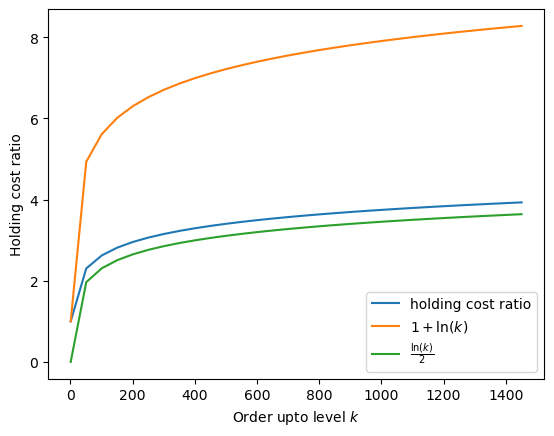

In [15]:
plt.plot(order_sizes_exp, hold_ratios_exp, label="holding cost ratio")
# plt.plot(order_sizes_exp, 0.5*(np.log(order_sizes_exp)+1)*(1 + 1/order_sizes_exp), label="$\\frac{\ln(eS)}{2}\\left(1+\\frac{1}{S}\\right)$")
plt.plot(order_sizes_exp, np.log(order_sizes_exp)+1, label="$1 + \\ln(k)$")
# plt.plot(order_sizes_exp, np.log(order_sizes_exp)+1, label="$\\frac{\ln(eS)}{2}\\left(1+\\frac{1}{S}\\right)$")
plt.plot(order_sizes_exp, 0.5*(np.log(order_sizes_exp)), label="$\\frac{\\ln(k)}{2}$")
plt.ylabel("Holding cost ratio")
plt.xlabel("Order upto level $k$")
# plt.suptitle("Tight example sequence for holding cost ratio")
# plt.title("Demand: Exponential, Policy: $(S, \lambda_{static} \cdot \mathbf{1})$")
plt.legend()
plt.savefig("worst_case_exp", format='pdf')

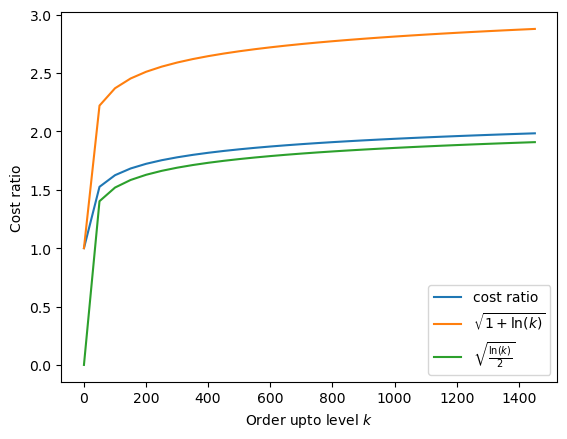

In [16]:
# max_cost_ratios_exp = np.sqrt(0.5*(np.log(order_sizes_exp)+1)*(1+(1+np.log(order_sizes_exp))/order_sizes_exp))
# max_cost_ratios_exp = np.sqrt(0.5*(order_sizes_exp + 1)*(np.log(order_sizes_exp)+1) / (order_sizes_exp+1))
plt.plot(order_sizes_exp, cost_ratios_exp, label="cost ratio")
plt.plot(order_sizes_exp, np.sqrt(1+np.log(order_sizes_exp)), label="$\sqrt{1+\\ln(k)}$")
# plt.plot(order_sizes_exp, max_cost_ratios_exp, label="$\sqrt{\\frac{\ln(eS)}{2}\cdot\\left(1 + \\frac{\ln(eS)}{S}\\right)}$")
plt.plot(order_sizes_exp, np.sqrt(0.5*(np.log(order_sizes_exp))), label="$\sqrt{\\frac{\\ln(k)}{2}}$")
plt.ylabel("Cost ratio")
plt.xlabel("Order upto level $k$")
# plt.suptitle("Tight example sequence for total cost ratio bound")
# plt.title("Demand: Exponential, Policy: $(S_{static}, \lambda_{static} \cdot \mathbf{1})$")
plt.legend()
plt.savefig("worst_case_exp_2", format='pdf')

In [3]:
a = 30
b = 1/15
exp_demand = ExponentialDemand(a=a, b=b) # linear demand: lambda = a(1-bp)
S = 32000
instance = exp_demand.optimal_instance_zero_leadtime(s=0, S=S, profit=0)
state_space = ZeroLeadTime(s=0, S=S)
policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
policy.rates = b * (np.arange(1,S+1)*instance.holding_cost)
print(S, policy.holding_cost_ratio, policy.profit)

32000 5.475532340839628 -1.1901590823981678e-13


In [10]:
a = 30
b = 1/15
exp_demand = ExponentialDemand(a=a, b=b) # Exponential demand: lambda = ae^(-bp)
cost_ratios_exp = []
order_sizes_exp = np.arange(1,8001,25)

for i, S in enumerate(order_sizes_exp):
    instance = exp_demand.optimal_instance_zero_leadtime(s=0, S=S, profit=0)
    state_space = ZeroLeadTime(s=0, S=S)
    policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space)
    policy.rates = b * (np.arange(1,S+1)*instance.holding_cost)
    optimal_costs = policy.result.holding + policy.result.ordering
    
    ratio = (S+1) * (np.log(S) + 1) / 2 / S
    S_static = np.ceil(S / np.sqrt(ratio))
    state_space_static = ZeroLeadTime(s=0, S=S_static)
    static_policy = ZeroLeadTimePolicy(instance=instance, demand=exp_demand, state_space=state_space_static)
    static_policy.rates = policy.static_rate * np.ones(state_space_static.shape)
    static_costs = static_policy.result.holding + static_policy.result.ordering
    cost_ratios_exp.append(static_costs / optimal_costs)
    print(S, cost_ratios_exp[i], policy.profit)

1 1.0 0.0
26 1.425463840358023 1.4210854715202004e-14
51 1.5252922321755684 0.0
76 1.5838123604089904 4.263256414560601e-14
101 1.62547994822722 0.0
126 1.6569146166923079 -1.4210854715202004e-14
151 1.6827902227460767 -7.105427357601002e-15
176 1.7044530971664065 0.0
201 1.7230431608157308 7.105427357601002e-15
226 1.7393039239723607 -1.0658141036401503e-14
251 1.753743523267666 3.552713678800501e-15
276 1.7667229563798106 -2.4868995751603507e-14
301 1.778507093626321 1.4210854715202004e-14
326 1.789528450959474 -3.552713678800501e-15
351 1.7994401255480876 -7.105427357601002e-15
376 1.8088467140815305 -2.1316282072803006e-14
401 1.8173895978672827 1.7763568394002505e-14
426 1.8255805402043892 0.0
451 1.8332721522557645 0.0
476 1.840328521992037 -3.552713678800501e-15
501 1.8471769985965218 0.0
526 1.8536675469550044 1.0658141036401503e-14
551 1.859834053216493 -1.0658141036401503e-14
576 1.865548391199276 -1.4210854715202004e-14
601 1.871154708086517 2.1316282072803006e-14
626 1.8765